Distribution des variables numériques 

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)

trace1 = go.Histogram(x=data1["SiteEUI(kBtu/sf)"],name="SiteEUI")
trace2 = go.Histogram(x=data1["SiteEUIWN(kBtu/sf)"],name="SiteEUIWN(kBtu/sf)")
trace3 = go.Histogram(x=data1["SiteEnergyUse(kBtu)"],name="SiteEnergyUse(kBtu)")
trace4 = go.Histogram(x=data1["SiteEnergyUseWN(kBtu)"],name="SiteEnergyUseWN(kBtu)")
trace5 = go.Histogram(x=data1["ENERGYSTARScore"],name="ENERGYSTARScore")
trace6 = go.Histogram(x=data1["SteamUse(kBtu)"],name="SteamUse(kBtu)")


fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3 , 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)

fig.show()

In [ ]:
from sklearn.impute import KNNImputer
# Entrainenement du modèle d'imputation sur un échantillon
knn_features = ["NumberofBuildings","SiteEnergyUse(kBtu)","NaturalGas(kBtu)","Electricity(kBtu)", "PropertyGFAParking","SteamUse(kBtu)", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)","TotalGHGEmissions","GHGEmissionsIntensity",  
                "SiteEnergyUseWN(kBtu)","ENERGYSTARScore"]
sample_datas = data1[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

In [ ]:
# Application du modèle sur l'ensemble des données
datas_imputed = imputer.transform(data1[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

for col_knn in knn_features:
    data1[col_knn] = df_datas_imputed[col_knn].values

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd

# import the KNNimputer class
from sklearn.impute import KNNImputer


# create dataset for marks of a student
dict = {'Maths':[80, 90, np.nan, 95],
		'Chemistry': [60, 65, 56, np.nan],
		'Physics':[np.nan, 57, 80, 78],
	'Biology' : [78,83,67,np.nan]}

# creating a data frame from the list
Before_imputation = pd.DataFrame(dict)
#print dataset before imputaion
print("Data Before performing imputation\n",Before_imputation)



Data Before performing imputation
    Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2    NaN       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN


In [ ]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",After_imputation)




After performing imputation
 [[80.  60.  68.5 78. ]
 [90.  65.  57.  83. ]
 [87.5 56.  80.  67. ]
 [95.  58.  78.  72.5]]


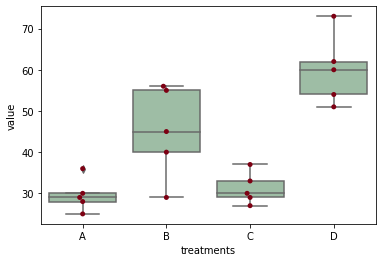

In [1]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [2]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [1]:
import pandas as pd
import numpy as np

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
